In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [2]:
df.shape

(325, 2)

In [3]:
import numpy as np

data = df.to_numpy()

In [4]:
data.shape

(325, 2)

In [5]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [6]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [7]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [8]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [9]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range((data_len-out_dim) - time_step):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [10]:
train_input.shape

(200, 100, 2)

In [11]:
train_label.shape

(200, 25, 1)

In [12]:
test_input.shape

(100, 2)

In [13]:
test_label.shape

(25, 1)

In [14]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [15]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(256, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=1000, verbose=1, shuffle=True, validation_split=0.20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66304     
                                                                 
 dense (Dense)               (None, 25)                6425      
                                                                 
Total params: 72,729
Trainable params: 72,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
5/5 [==============================] - 1s 79ms/step - loss: 0.8755 - mae: 0.7524 - val_loss: 0.2765 - val_mae: 0.4265
Epoch 2/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.2491 - mae: 0.4002 - val_loss: 0.1565 - val_mae: 0.3178
Epoch 3/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.1766 - mae: 0.3349 - val_loss: 0.1638 - val_mae: 0.3291
Epoch 4/1000
5/5 [==============================] - 0s 

Epoch 58/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0116 - mae: 0.0856 - val_loss: 0.0126 - val_mae: 0.0881
Epoch 59/1000
5/5 [==============================] - 0s 44ms/step - loss: 0.0111 - mae: 0.0832 - val_loss: 0.0125 - val_mae: 0.0883
Epoch 60/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0110 - mae: 0.0832 - val_loss: 0.0119 - val_mae: 0.0846
Epoch 61/1000
5/5 [==============================] - 0s 46ms/step - loss: 0.0106 - mae: 0.0811 - val_loss: 0.0122 - val_mae: 0.0869
Epoch 62/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0103 - mae: 0.0811 - val_loss: 0.0116 - val_mae: 0.0846
Epoch 63/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0105 - mae: 0.0814 - val_loss: 0.0121 - val_mae: 0.0853
Epoch 64/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0099 - mae: 0.0789 - val_loss: 0.0122 - val_mae: 0.0869
Epoch 65/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.

Epoch 120/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0045 - mae: 0.0531 - val_loss: 0.0063 - val_mae: 0.0617
Epoch 121/1000
5/5 [==============================] - 0s 46ms/step - loss: 0.0043 - mae: 0.0517 - val_loss: 0.0068 - val_mae: 0.0647
Epoch 122/1000
5/5 [==============================] - 0s 44ms/step - loss: 0.0043 - mae: 0.0519 - val_loss: 0.0061 - val_mae: 0.0616
Epoch 123/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.0039 - mae: 0.0495 - val_loss: 0.0065 - val_mae: 0.0629
Epoch 124/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.0044 - mae: 0.0525 - val_loss: 0.0069 - val_mae: 0.0653
Epoch 125/1000
5/5 [==============================] - 0s 46ms/step - loss: 0.0052 - mae: 0.0573 - val_loss: 0.0069 - val_mae: 0.0649
Epoch 126/1000
5/5 [==============================] - 0s 49ms/step - loss: 0.0046 - mae: 0.0533 - val_loss: 0.0073 - val_mae: 0.0669
Epoch 127/1000
5/5 [==============================] - 0s 43ms/step - 

Epoch 243/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0043 - val_mae: 0.0520
Epoch 244/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0022 - mae: 0.0365 - val_loss: 0.0040 - val_mae: 0.0495
Epoch 245/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0041 - val_mae: 0.0505
Epoch 246/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0039 - val_mae: 0.0493
Epoch 247/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0023 - mae: 0.0374 - val_loss: 0.0046 - val_mae: 0.0537
Epoch 248/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0023 - mae: 0.0376 - val_loss: 0.0042 - val_mae: 0.0508
Epoch 249/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0049 - val_mae: 0.0552
Epoch 250/1000
5/5 [==============================] - 0s 42ms/step - 

Epoch 366/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0013 - mae: 0.0288 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 367/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 0.0038 - val_mae: 0.0479
Epoch 368/1000
5/5 [==============================] - 0s 43ms/step - loss: 0.0013 - mae: 0.0280 - val_loss: 0.0035 - val_mae: 0.0459
Epoch 369/1000
5/5 [==============================] - 0s 42ms/step - loss: 0.0012 - mae: 0.0277 - val_loss: 0.0035 - val_mae: 0.0463
Epoch 370/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0039 - val_mae: 0.0480
Epoch 371/1000
5/5 [==============================] - 0s 40ms/step - loss: 0.0017 - mae: 0.0330 - val_loss: 0.0037 - val_mae: 0.0470
Epoch 372/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0015 - mae: 0.0308 - val_loss: 0.0037 - val_mae: 0.0476
Epoch 373/1000
5/5 [==============================] - 0s 43ms/step - 

Epoch 488/1000
5/5 [==============================] - 0s 44ms/step - loss: 8.9592e-04 - mae: 0.0238 - val_loss: 0.0031 - val_mae: 0.0431
Epoch 489/1000
5/5 [==============================] - 0s 45ms/step - loss: 9.4042e-04 - mae: 0.0245 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 490/1000
5/5 [==============================] - 0s 45ms/step - loss: 0.0010 - mae: 0.0252 - val_loss: 0.0033 - val_mae: 0.0447
Epoch 491/1000
5/5 [==============================] - 0s 45ms/step - loss: 8.7862e-04 - mae: 0.0237 - val_loss: 0.0030 - val_mae: 0.0420
Epoch 492/1000
5/5 [==============================] - 0s 42ms/step - loss: 7.7695e-04 - mae: 0.0222 - val_loss: 0.0032 - val_mae: 0.0442
Epoch 493/1000
5/5 [==============================] - 0s 44ms/step - loss: 8.2773e-04 - mae: 0.0227 - val_loss: 0.0033 - val_mae: 0.0448
Epoch 494/1000
5/5 [==============================] - 0s 42ms/step - loss: 8.2136e-04 - mae: 0.0228 - val_loss: 0.0028 - val_mae: 0.0409
Epoch 495/1000
5/5 [=========================

Epoch 608/1000
5/5 [==============================] - 0s 39ms/step - loss: 3.7758e-04 - mae: 0.0156 - val_loss: 0.0024 - val_mae: 0.0380
Epoch 609/1000
5/5 [==============================] - 0s 39ms/step - loss: 3.8935e-04 - mae: 0.0156 - val_loss: 0.0025 - val_mae: 0.0381
Epoch 610/1000
5/5 [==============================] - 0s 39ms/step - loss: 3.3973e-04 - mae: 0.0148 - val_loss: 0.0023 - val_mae: 0.0375
Epoch 611/1000
5/5 [==============================] - 0s 40ms/step - loss: 3.3390e-04 - mae: 0.0145 - val_loss: 0.0023 - val_mae: 0.0368
Epoch 612/1000
5/5 [==============================] - 0s 39ms/step - loss: 3.3580e-04 - mae: 0.0146 - val_loss: 0.0023 - val_mae: 0.0375
Epoch 613/1000
5/5 [==============================] - 0s 39ms/step - loss: 3.2737e-04 - mae: 0.0145 - val_loss: 0.0028 - val_mae: 0.0406
Epoch 614/1000
5/5 [==============================] - 0s 41ms/step - loss: 4.1730e-04 - mae: 0.0164 - val_loss: 0.0022 - val_mae: 0.0365
Epoch 615/1000
5/5 [=====================

5/5 [==============================] - 0s 40ms/step - loss: 2.1471e-04 - mae: 0.0117 - val_loss: 0.0019 - val_mae: 0.0336
Epoch 729/1000
5/5 [==============================] - 0s 43ms/step - loss: 2.0496e-04 - mae: 0.0113 - val_loss: 0.0019 - val_mae: 0.0337
Epoch 730/1000
5/5 [==============================] - 0s 40ms/step - loss: 2.2042e-04 - mae: 0.0118 - val_loss: 0.0019 - val_mae: 0.0339
Epoch 731/1000
5/5 [==============================] - 0s 40ms/step - loss: 2.1617e-04 - mae: 0.0118 - val_loss: 0.0019 - val_mae: 0.0334
Epoch 732/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.1964e-04 - mae: 0.0119 - val_loss: 0.0019 - val_mae: 0.0334
Epoch 733/1000
5/5 [==============================] - 0s 39ms/step - loss: 2.2686e-04 - mae: 0.0121 - val_loss: 0.0019 - val_mae: 0.0338
Epoch 734/1000
5/5 [==============================] - 0s 39ms/step - loss: 1.9298e-04 - mae: 0.0112 - val_loss: 0.0019 - val_mae: 0.0327
Epoch 735/1000
5/5 [==============================] - 0s

Epoch 788/1000
5/5 [==============================] - 0s 45ms/step - loss: 2.5732e-04 - mae: 0.0127 - val_loss: 0.0018 - val_mae: 0.0327
Epoch 789/1000
5/5 [==============================] - 0s 43ms/step - loss: 2.6870e-04 - mae: 0.0131 - val_loss: 0.0018 - val_mae: 0.0331
Epoch 790/1000
5/5 [==============================] - 0s 44ms/step - loss: 3.1828e-04 - mae: 0.0143 - val_loss: 0.0019 - val_mae: 0.0331
Epoch 791/1000
5/5 [==============================] - 0s 46ms/step - loss: 3.3561e-04 - mae: 0.0147 - val_loss: 0.0018 - val_mae: 0.0324
Epoch 792/1000
5/5 [==============================] - 0s 40ms/step - loss: 4.2949e-04 - mae: 0.0165 - val_loss: 0.0021 - val_mae: 0.0359
Epoch 793/1000
5/5 [==============================] - 0s 46ms/step - loss: 5.7413e-04 - mae: 0.0191 - val_loss: 0.0019 - val_mae: 0.0332
Epoch 794/1000
5/5 [==============================] - 0s 45ms/step - loss: 3.9921e-04 - mae: 0.0159 - val_loss: 0.0020 - val_mae: 0.0344
Epoch 795/1000
5/5 [=====================

Epoch 849/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0017 - mae: 0.0326 - val_loss: 0.0039 - val_mae: 0.0492
Epoch 850/1000
5/5 [==============================] - 0s 41ms/step - loss: 0.0016 - mae: 0.0320 - val_loss: 0.0035 - val_mae: 0.0462
Epoch 851/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 852/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.0012 - mae: 0.0269 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 853/1000
5/5 [==============================] - 0s 37ms/step - loss: 0.0011 - mae: 0.0261 - val_loss: 0.0029 - val_mae: 0.0426
Epoch 854/1000
5/5 [==============================] - 0s 38ms/step - loss: 8.7747e-04 - mae: 0.0236 - val_loss: 0.0029 - val_mae: 0.0420
Epoch 855/1000
5/5 [==============================] - 0s 42ms/step - loss: 8.1124e-04 - mae: 0.0227 - val_loss: 0.0027 - val_mae: 0.0413
Epoch 856/1000
5/5 [==============================] - 0s 38ms

Epoch 909/1000
5/5 [==============================] - 0s 41ms/step - loss: 1.7365e-04 - mae: 0.0106 - val_loss: 0.0017 - val_mae: 0.0318
Epoch 910/1000
5/5 [==============================] - 0s 41ms/step - loss: 1.6849e-04 - mae: 0.0103 - val_loss: 0.0016 - val_mae: 0.0316
Epoch 911/1000
5/5 [==============================] - 0s 40ms/step - loss: 1.6631e-04 - mae: 0.0102 - val_loss: 0.0017 - val_mae: 0.0318
Epoch 912/1000
5/5 [==============================] - 0s 40ms/step - loss: 1.4605e-04 - mae: 0.0096 - val_loss: 0.0016 - val_mae: 0.0312
Epoch 913/1000
5/5 [==============================] - 0s 41ms/step - loss: 1.4563e-04 - mae: 0.0096 - val_loss: 0.0016 - val_mae: 0.0317
Epoch 914/1000
5/5 [==============================] - 0s 40ms/step - loss: 1.4985e-04 - mae: 0.0097 - val_loss: 0.0016 - val_mae: 0.0313
Epoch 915/1000
5/5 [==============================] - 0s 40ms/step - loss: 1.4349e-04 - mae: 0.0095 - val_loss: 0.0016 - val_mae: 0.0312
Epoch 916/1000
5/5 [=====================

Epoch 969/1000
5/5 [==============================] - 0s 39ms/step - loss: 1.6222e-04 - mae: 0.0101 - val_loss: 0.0015 - val_mae: 0.0301
Epoch 970/1000
5/5 [==============================] - 0s 40ms/step - loss: 1.7058e-04 - mae: 0.0103 - val_loss: 0.0015 - val_mae: 0.0299
Epoch 971/1000
5/5 [==============================] - 0s 39ms/step - loss: 1.7256e-04 - mae: 0.0105 - val_loss: 0.0015 - val_mae: 0.0301
Epoch 972/1000
5/5 [==============================] - 0s 40ms/step - loss: 1.7550e-04 - mae: 0.0106 - val_loss: 0.0015 - val_mae: 0.0299
Epoch 973/1000
5/5 [==============================] - 0s 41ms/step - loss: 1.5902e-04 - mae: 0.0099 - val_loss: 0.0014 - val_mae: 0.0294
Epoch 974/1000
5/5 [==============================] - 0s 40ms/step - loss: 1.4848e-04 - mae: 0.0096 - val_loss: 0.0014 - val_mae: 0.0288
Epoch 975/1000
5/5 [==============================] - 0s 40ms/step - loss: 1.2314e-04 - mae: 0.0088 - val_loss: 0.0014 - val_mae: 0.0292
Epoch 976/1000
5/5 [=====================

In [16]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 96ms/step


In [17]:
test_input.shape

(1, 100, 2)

In [18]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [19]:
test_label.shape

(1, 25, 1)

In [20]:
y_hat

array([[1.2181149, 1.4919463, 1.907963 , 1.6578463, 2.0747404, 2.336207 ,
        1.6261156, 2.1392019, 1.8691095, 1.9708667, 2.1082156, 2.4253228,
        1.2917653, 1.5174414, 1.9876518, 1.821265 , 2.2228584, 2.4014094,
        1.9164058, 2.1876447, 1.8134248, 2.171473 , 2.192796 , 2.4325871,
        1.3294061]], dtype=float32)

In [21]:
y_hat.shape

(1, 25)

In [22]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [23]:
y_hat = (y_hat*data_std)+data_mean

In [24]:
#print(scaler.data_max_)

In [25]:
#print(scaler.data_min_)

In [26]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

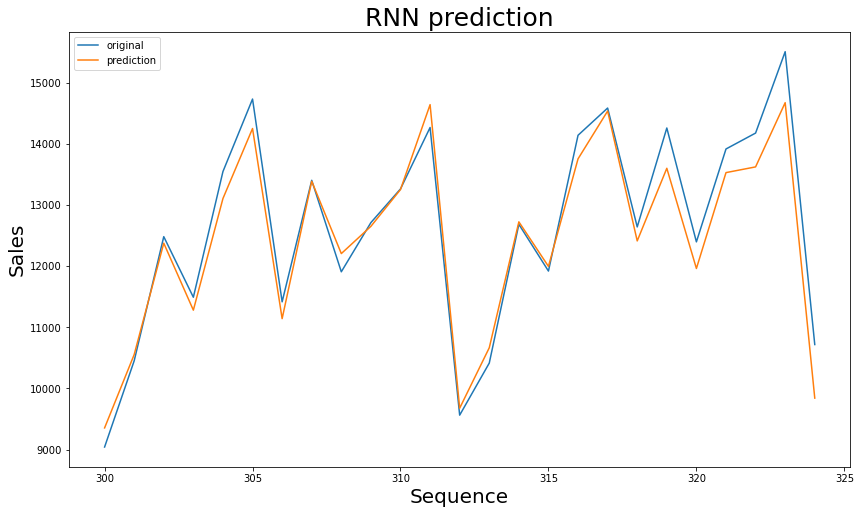

In [27]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [28]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 24ms/step - loss: 0.0078 - mae: 0.0692


[0.00777342077344656, 0.06919758021831512]